In [14]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

df = pd.read_csv('../../data/demoji.tsv', sep='\t', converters={'target': str})
# df = pd.read_csv('../../data/tweets_train.tsv', sep='\t', converters={'target': str})
# df = pd.read_csv('../../data/tweets_train_clean.tsv', sep='\t', converters={'target': str})

1     984
0     753
-1    601
NA    161
Name: target, dtype: int64

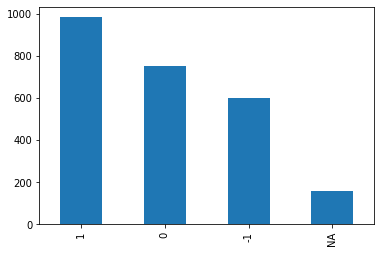

In [15]:
df["target"].value_counts().plot.bar()
df["target"].value_counts()

### Clean tweets from *@user* and *urls*  

User tags and urls are removed from tweets as they do not affect the semantics of the tweets.  
Hashtags are keeped in tweets. 
  
Max tweet length should be 280 characters.

In [16]:
import re

def clean_tweet(tweet: str) -> str:
    """Removes usernames, links and additional whitespaces"""
    wo_usernames = re.sub('@[^\s]+', '', tweet)
    wo_links = re.sub('http[^\s]+','', wo_usernames)
    wo_whitespaces = ' '.join(wo_links.split())
    return wo_whitespaces

In [17]:
df["full_text"] = df["full_text"].progress_apply(clean_tweet)
df["full_text"].str.len().describe()

count    2499.000000
mean      165.198079
std        75.891760
min        12.000000
25%        99.000000
50%       161.000000
75%       231.000000
max       468.000000
Name: full_text, dtype: float64

### Tweets embedding with LaBSE model

In [18]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/LaBSE")
model.max_seq_length = 150

In [19]:
df["embedding"] = df["full_text"].progress_apply(model.encode)
# 20m 31s -> default
# 42m 11s -> 150
# 90m 3s -> 100


# 150 demoji -> 17min

In [20]:
df.to_json('../../data/embedded_train_demoji_150.jl', lines=True, orient='records')
# df.to_json('../../data/embedded_train_clean.jl', lines=True, orient='records')